In [2]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torch.nn.functional as F
import numpy as np

# torch.manual_seed(1)

EPOCH = 2
LR = 0.001
DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=torchvision.transforms.ToTensor(),
                                        download=DOWNLOAD_MNIST, )
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)

print(train_data.data.shape)
print("####")
print(type(train_data))
print("####")
print(test_data)
print("####")
print(train_data.targets)
print("####")

train_x = torch.unsqueeze(train_data.data, dim=1).type(torch.FloatTensor) / 255.
train_y = train_data.targets
print(train_x.shape)

test_x = torch.unsqueeze(test_data.data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
test_y = test_data.targets[:2000]

# warning
# train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor) / 255.
# train_y = train_data.train_labels
# print(train_x.shape)

# test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
# test_y = test_data.test_labels[:2000]

# /Users/kancheng/opt/anaconda3/envs/pytorch-init/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: 
# UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. 
# This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. 
# You may want to copy the array to protect its data or make it writeable before converting it to a tensor. 
# This type of warning will be suppressed for the rest of this program. 
# (Triggered internally at  
# /Users/distiller/project/conda/conda-bld/pytorch_1631631227379/work/torch/csrc/utils/tensor_numpy.cpp:180.)
#  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
# https://github.com/huggingface/datasets/issues/616

torch.Size([60000, 28, 28])
####
<class 'torchvision.datasets.mnist.MNIST'>
####
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./mnist/
    Split: Test
####
tensor([5, 0, 4,  ..., 5, 6, 8])
####
torch.Size([60000, 1, 28, 28])


In [3]:
test_x.shape

torch.Size([2000, 1, 28, 28])

In [4]:
import matplotlib.pyplot as plt

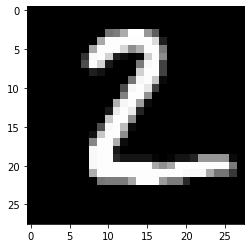

In [5]:
plt.imshow(test_x[1,0,:,:].numpy(), 'gray')

In [6]:
test_y[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [7]:
class FC(nn.Module):
    def __init__(self):
        super(FC, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        self.fc3 = nn.Linear(10, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)

        output = x
        return output


fc = FC()

optimizer = torch.optim.Adam(fc.parameters(), lr=LR)
# loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

data_size = 20000
batch_size = 50

for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
#         print(b_x.shape)
#         print(b_y.shape)

        output = fc(b_x)
        loss = loss_func(output, b_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

Epoch:  0 | train loss: 2.3031 | test accuracy: 0.206
Epoch:  0 | train loss: 1.5719 | test accuracy: 0.566
Epoch:  0 | train loss: 0.8695 | test accuracy: 0.760
Epoch:  0 | train loss: 0.7395 | test accuracy: 0.811
Epoch:  0 | train loss: 0.4410 | test accuracy: 0.819
Epoch:  0 | train loss: 0.4334 | test accuracy: 0.845
Epoch:  0 | train loss: 0.3815 | test accuracy: 0.866
Epoch:  0 | train loss: 0.3506 | test accuracy: 0.860
Epoch:  1 | train loss: 0.3170 | test accuracy: 0.867
Epoch:  1 | train loss: 0.3806 | test accuracy: 0.883
Epoch:  1 | train loss: 0.5014 | test accuracy: 0.899
Epoch:  1 | train loss: 0.2266 | test accuracy: 0.887
Epoch:  1 | train loss: 0.1690 | test accuracy: 0.905
Epoch:  1 | train loss: 0.2221 | test accuracy: 0.905
Epoch:  1 | train loss: 0.5117 | test accuracy: 0.904
Epoch:  1 | train loss: 0.0755 | test accuracy: 0.914
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]) prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


In [8]:
test_output = fc(test_x[:1])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:1], 'real number')

tensor(7) prediction number
tensor([7]) real number


In [9]:
test_output

tensor([[ -7.0378,   1.1438,  -1.2247,   1.5223, -10.8661,  -4.7178, -13.1209,
           6.9689,  -5.4211,  -0.9974]], grad_fn=<AddmmBackward>)

In [10]:
test_x[:1].shape

torch.Size([1, 1, 28, 28])

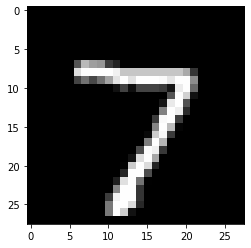

In [11]:
plt.imshow(test_x[:1].numpy().squeeze(), 'gray')

In [12]:
import torch
torch.eye(10)
0, 1, 2, ..., 9 

(0, 1, 2, Ellipsis, 9)

In [13]:
# Kan Horst